> # **Word Embedding**
- Frequency Based Embedding or Pre-processing
  1. One-hot Encoding
  2. Bag-of-words
  3. TF-IDF

- Word Embeddings are numeric representations of words in a lower-dimensional space, that capture semantic and syntactic information.

In [3]:
documents = [ "The quick brown fox jumps over the lazy dog.",
    "A journey of a thousand miles begins with a single step." ]

> **One-Hot Encoding**
- Each word in the vocabulary is represented as a unique vector, where the dimensionality of the vector is equal to the size of the vocabulary.
- The vector has all elements set to 0, except for the element corresponding to the index of the word in the vocabulary, which is set to 1.

In [8]:
def one_hot_encoding(text):
  words = text.split()
  vocabulary = set(words)
  word_to_index = {word: i for i, word in enumerate(vocabulary)}
  one_hot_encoding = []
  for word in words:
    one_hot_vector = [0] * len(vocabulary)
    one_hot_vector[word_to_index[word]] = 1
    one_hot_encoding.append(one_hot_vector)
  return one_hot_encoding, vocabulary

one_hot_encoding_result, vocabulary = one_hot_encoding(documents[0])

print(one_hot_encoding_result)
print("vocabulary :", vocabulary)
print("vocabulary size :", len(vocabulary))
for word, encoding in enumerate(one_hot_encoding_result):
  print(f"{word} : {encoding}")

[[0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1]]
vocabulary : {'jumps', 'brown', 'quick', 'over', 'fox', 'The', 'lazy', 'the', 'dog.'}
vocabulary size : 9
0 : [0, 0, 0, 0, 0, 1, 0, 0, 0]
1 : [0, 0, 1, 0, 0, 0, 0, 0, 0]
2 : [0, 1, 0, 0, 0, 0, 0, 0, 0]
3 : [0, 0, 0, 0, 1, 0, 0, 0, 0]
4 : [1, 0, 0, 0, 0, 0, 0, 0, 0]
5 : [0, 0, 0, 1, 0, 0, 0, 0, 0]
6 : [0, 0, 0, 0, 0, 0, 0, 1, 0]
7 : [0, 0, 0, 0, 0, 0, 1, 0, 0]
8 : [0, 0, 0, 0, 0, 0, 0, 0, 1]


> **Bag of Word (Bow)**
- Text representation technique that represents a document as an unordered set of words and their respective frequencies.
- It discards the word order and captures the frequency of each word in the document, creating a vector representation.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()
bow_Matrix = bow.fit_transform(documents)
bow_feature_names = bow.get_feature_names_out()

print(bow_Matrix.toarray())
print("vocabulary (feature_names) : ", bow_feature_names)

[[0 1 1 1 0 1 1 0 0 1 1 0 0 2 0 0]
 [1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1]]
vocabulary (feature_names) :  ['begins' 'brown' 'dog' 'fox' 'journey' 'jumps' 'lazy' 'miles' 'of' 'over'
 'quick' 'single' 'step' 'the' 'thousand' 'with']


> **Term frequency-inverse document frequency (TF-IDF)**
- Numerical statistic that reflects the importance of a word in a document  relative to a collection of documents (corpus).
- Term Frequency (TF): Measures how often a term (word) appears in a document.
- Inverse Document Frequency (IDF): Measures the importance of a term across a collection of documents.

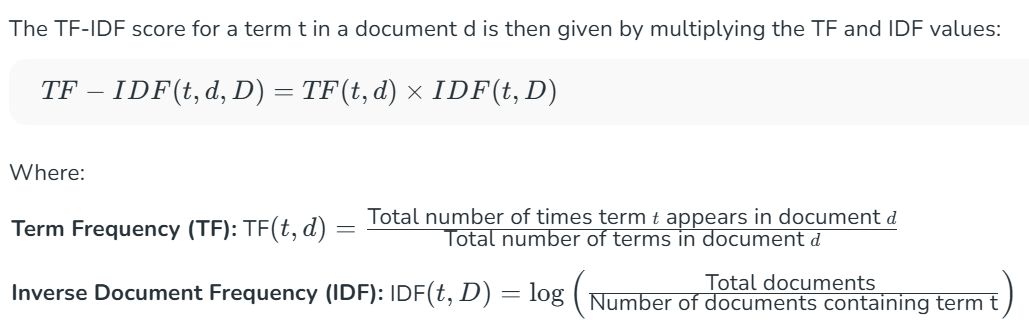

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_Matrix = tfidf.fit_transform(documents).toarray()
feature_Names = tfidf.get_feature_names_out()

print(feature_Names)
print(tfidf_Matrix)

['begins' 'brown' 'dog' 'fox' 'journey' 'jumps' 'lazy' 'miles' 'of' 'over'
 'quick' 'single' 'step' 'the' 'thousand' 'with']
[[0.         0.30151134 0.30151134 0.30151134 0.         0.30151134
  0.30151134 0.         0.         0.30151134 0.30151134 0.
  0.         0.60302269 0.         0.        ]
 [0.35355339 0.         0.         0.         0.35355339 0.
  0.         0.35355339 0.35355339 0.         0.         0.35355339
  0.35355339 0.         0.35355339 0.35355339]]
